# Part 4

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
def activation_function(s):
    return np.tanh(s)

In [3]:
N = 100
theta = np.random.uniform(0, 2 * math.pi, size=N)

## Question 1: Connectivity matrix

In [4]:
J = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        J[i,j] = 2 * math.cos(theta[i] - theta[j])

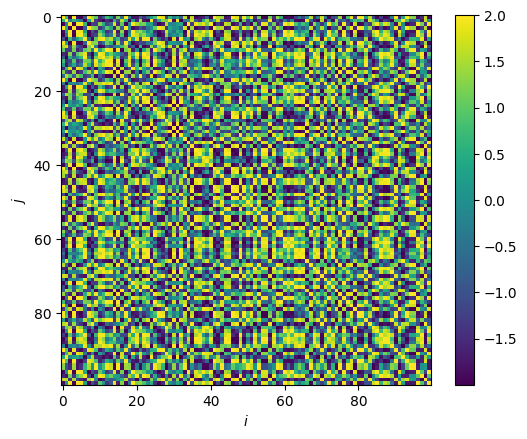

In [5]:
plt.imshow(J)
plt.colorbar()
plt.xlabel("$i$")
plt.ylabel("$j$")
plt.savefig("figures/part4_connectivity_matrix.svg")
plt.show()

## Question 2: Dynamics with Euler method

In [6]:
T = 1000
dt = 0.1

# Euler method
x = np.random.uniform(-10, 10, size=(T, N))
for t in range(T - 1):
    x[t+1] = x[t] + (-x[t] + J @ activation_function(x[t])) * dt

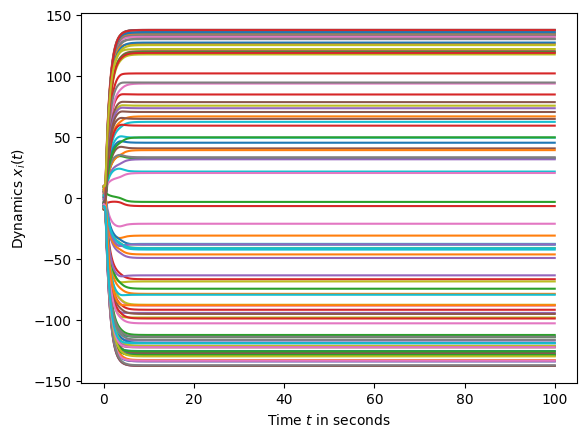

In [7]:
plt.plot(np.linspace(0, T * dt, T), x)
plt.xlabel("Time $t$ in seconds")
plt.ylabel("Dynamics $x_i(t)$")
plt.savefig("figures/part4_dynamics.svg")
plt.show()

## Question 3: PCA

In [8]:
def PCA(X):
    # Step 2: Subtract mean
    X_prime = np.copy(X)
    for i in range(N):
        mean = np.sum(x[i]) / T
        X_prime[i] -= mean

    # Step 3: Compute covariance matrix
    sigma = X_prime @ np.transpose(X_prime) / T

    # Step 4: Eigen values and vectors
    e, v = np.linalg.eig(sigma)
    e = np.abs(e) # keep only magnitude (so we have reals and not complexes)

    return e, v, sigma, X_prime

In [9]:
x = np.transpose(x)
e, v, sigma, x_prime = PCA(x)

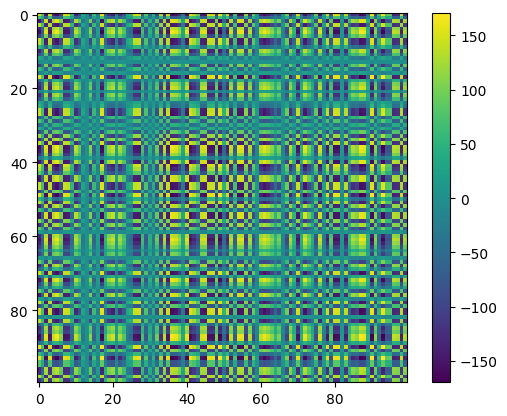

In [10]:
plt.imshow(sigma)
plt.colorbar()
plt.savefig("figures/part4_covariance_matrix_pca.svg")
plt.show()

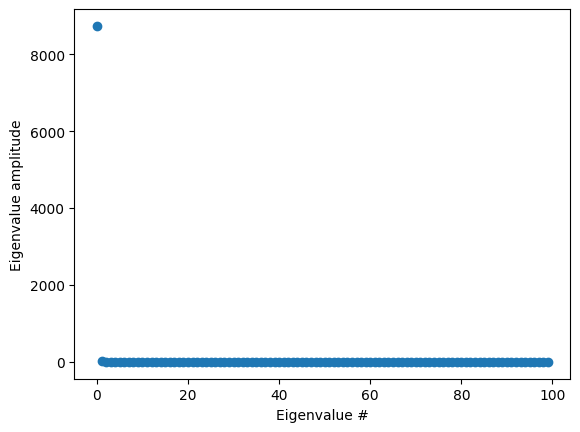

In [11]:
plt.scatter(range(len(e)), np.abs(e))
plt.xlabel("Eigenvalue #")
plt.ylabel("Eigenvalue amplitude")
plt.savefig("figures/part4_eigenvalues.svg")
plt.show()

#### Explained variance of principal component

$$
EV_1 = \frac{\lambda_1}{\sum^N_{i=1} \lambda_i}
$$

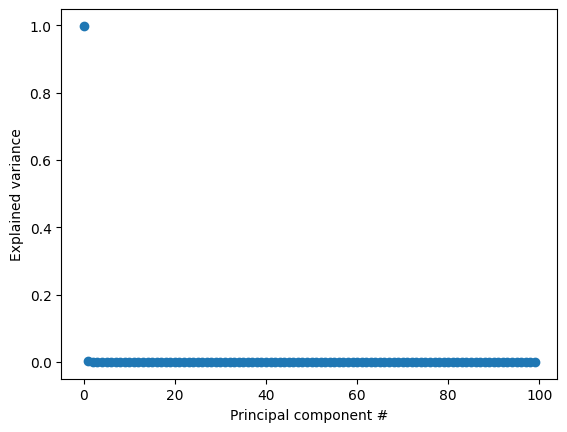

In [12]:
explained_variance = e / np.sum(e)

plt.scatter(range(len(explained_variance)), explained_variance)
plt.ylabel("Explained variance")
plt.xlabel("Principal component #")
plt.savefig("figures/part4_explained_variance.svg")
plt.show()

(100, 1000)
(100, 2)


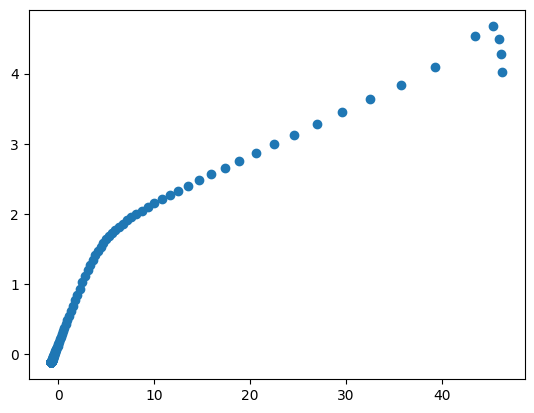

In [13]:
v = np.abs(v)
print(np.shape(x_prime))
print(np.shape(np.stack([v[0], v[1]]).T))
pca = np.transpose(x_prime) @ np.stack([v[0], v[1]]).T
x1 = pca[:,0]
x2 = pca[:,1]
plt.scatter(x1, x2)
plt.show()

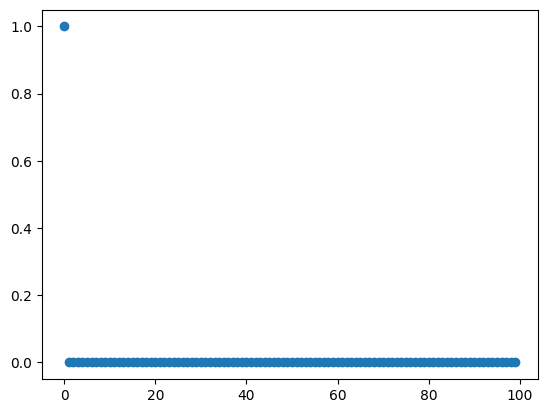

In [14]:
import sklearn
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=100)
pca.fit(x)
plt.scatter(range(100), pca.explained_variance_ratio_)
plt.show()

(100, 1000)
(100, 2)


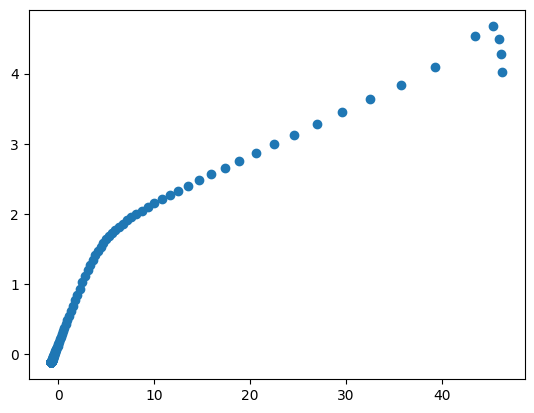

In [15]:
v = np.abs(v)
print(np.shape(x_prime))
print(np.shape(np.stack([v[0], v[1]]).T))
pca = np.transpose(x_prime) @ np.stack([v[0], v[1]]).T
x1 = pca[:,0]
x2 = pca[:,1]
plt.scatter(x1, x2)
plt.show()

## Question 4:

In [16]:
from numba import njit

In [17]:
@njit(parallel=True)
def collect_attractors():
    Q = np.zeros((500, 100))
    for i in range(500):
        T = 50
        dt = 0.1

        # Euler method
        Q[i] = np.random.uniform(-10, 10, size=100)
        for t in range(T - 1):
            Q[i] = Q[i] + (-Q[i] + np.dot(J, np.tanh(Q[i]))) * dt

    return np.transpose(Q)

Q = collect_attractors()

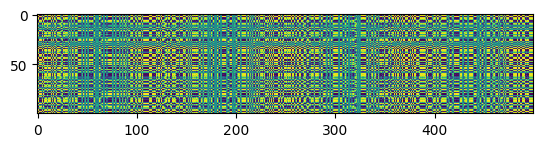

In [29]:
plt.imshow(Q)
plt.savefig("figures/part4_mat_q.svg")
plt.show()

In [19]:
e, v, sigma, Q_prime = PCA(Q)

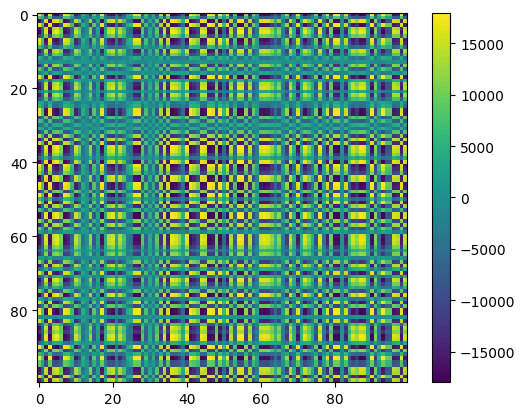

In [32]:
plt.imshow(sigma)
plt.colorbar()
plt.savefig("figures/part4_q_covariance_mat.svg")
plt.show()

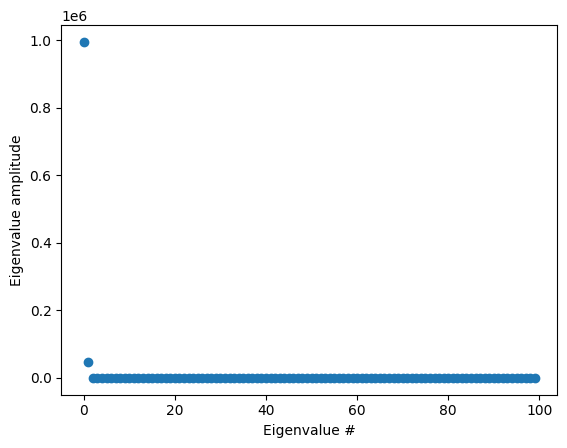

In [35]:
plt.scatter(range(len(e)), np.abs(e))
plt.xlabel("Eigenvalue #")
plt.ylabel("Eigenvalue amplitude")
plt.savefig("figures/part4_q_eigenvalues.svg")
plt.show()

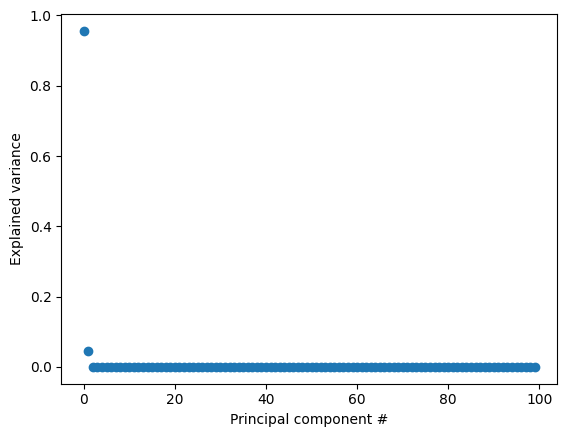

In [33]:
explained_variance = e / np.sum(e)

plt.scatter(range(len(explained_variance)), explained_variance)
plt.ylabel("Explained variance")
plt.xlabel("Principal component #")
plt.savefig("figures/part4_q_explained_variance.svg")
plt.show()

In [39]:
print(explained_variance[:3])

[9.56052957e-01 4.39469088e-02 8.35606568e-08]


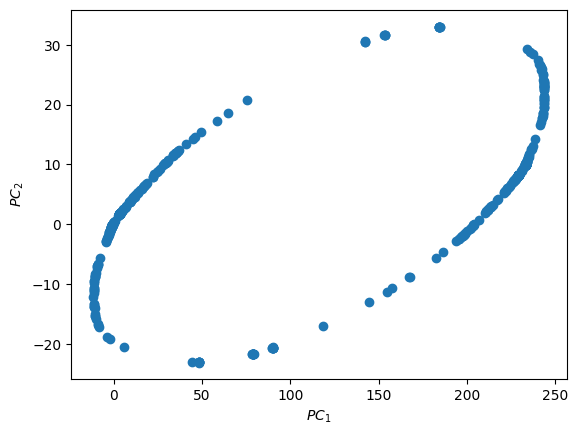

In [34]:
pca = np.transpose(Q_prime) @ np.stack([v[0], v[1]]).T
x1 = pca[:,0]
x2 = pca[:,1]
plt.scatter(x1, x2)
plt.xlabel("$PC_1$")
plt.ylabel("$PC_2$")
plt.savefig("figures/part4_q_simplified.svg")
plt.show()

## Question 5: With scikitlearn

In [56]:
import sklearn
import sklearn.decomposition
pca = sklearn.decomposition.PCA(n_components=2)
pca.fit(np.transpose(Q))

PCA(n_components=2)

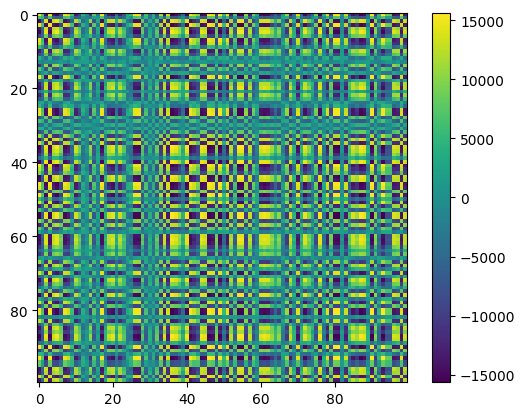

In [57]:
plt.imshow(pca.get_covariance())
plt.colorbar()
plt.show()

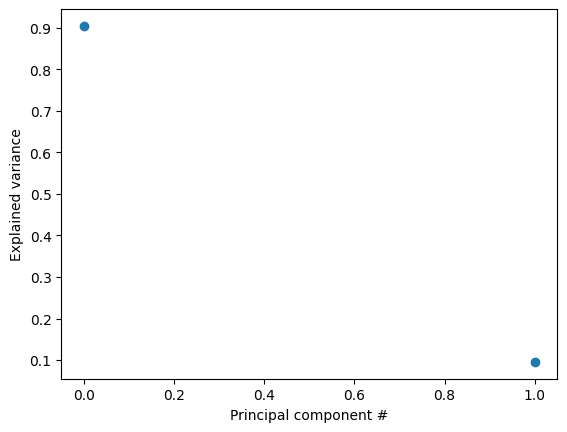

In [58]:
plt.scatter(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_)
plt.ylabel("Explained variance")
plt.xlabel("Principal component #")
plt.show()

[[-9.67449472e+02 -2.27245936e+01]
 [-9.65757437e+02 -2.67184473e+01]
 [ 1.06498435e+03 -6.97380881e+00]
 [ 1.04685730e+03  1.20219332e+02]
 [ 1.04167177e+03 -8.68890432e+01]
 [-7.72193386e+02  4.47149553e+02]
 [ 1.06608321e+03  7.66629711e+00]
 [-6.96583335e+02  5.30685087e+02]
 [-9.66824559e+02  2.86250687e+01]
 [-9.64593787e+02  3.60544779e+01]
 [-1.67558284e+01  7.94785203e+02]
 [-9.53619741e+02  7.55889768e+01]
 [-9.66786633e+02  2.77386771e+01]
 [-9.67730785e+02  2.76088359e+01]
 [ 1.04175651e+03 -8.58516158e+01]
 [-8.91209278e+02 -2.62056587e+02]
 [ 1.06522153e+03  4.78764295e+01]
 [-9.68001553e+02  2.85654905e+01]
 [-5.97494008e+02  6.05348434e+02]
 [ 1.06463504e+03  4.93866263e+01]
 [-8.05963666e+02 -3.93986308e+02]
 [-8.74534405e+02 -2.97576461e+02]
 [-9.66388123e+02 -2.84622279e+01]
 [-8.08350127e+02  3.98512137e+02]
 [ 3.35229319e+02  7.69593753e+02]
 [ 1.03950025e+03  1.41975390e+02]
 [-9.65618700e+02 -2.20390256e+01]
 [-7.82201826e+02  4.35403593e+02]
 [-9.06260617e+02 -2

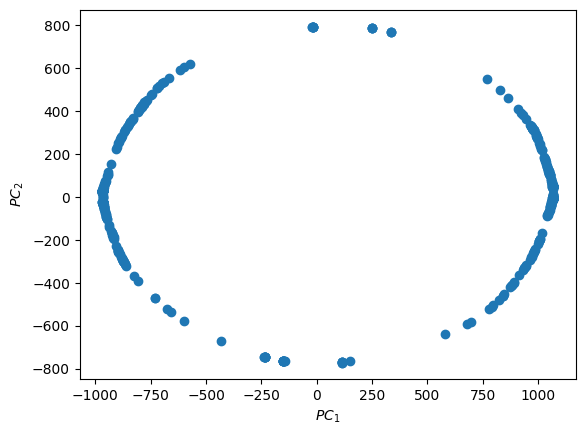

In [62]:
results = pca.transform(np.transpose(Q_prime))
x1 = results[:,0]
x2 = results[:,1]
plt.scatter(x1, x2)
plt.xlabel("$PC_1$")
plt.ylabel("$PC_2$")
plt.show()